<a href="https://colab.research.google.com/github/tiwaryanwesha23/Recommender-System/blob/main/RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data_movies = pd.read_csv('/content/drive/MyDrive/data/movies.csv')
data_ratings = pd.read_csv('/content/drive/MyDrive/data/ratings.csv')
data_users = pd.read_csv('/content/drive/MyDrive/data/users.csv')

In [32]:
data_ratings.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [33]:
data_ratings.tail()

,userId,movieId,rating
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4
1000208,6040,1097,4


In [34]:
data_ratings.shape

(1000209, 3)

In [35]:
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   userId   1000209 non-null  int64
 1   movieId  1000209 non-null  int64
 2   rating   1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


### **DATA VISUALIZATION**

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

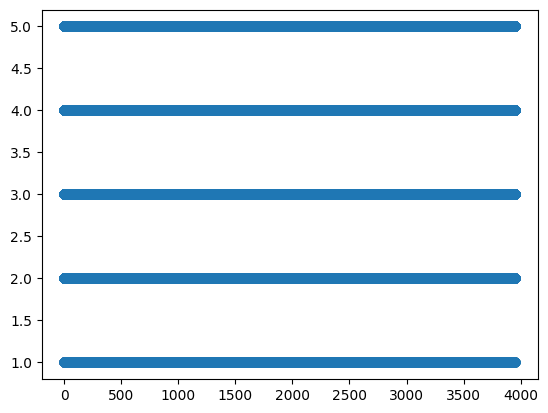

In [37]:
plt.scatter(data_ratings['movieId'],data_ratings['rating'])

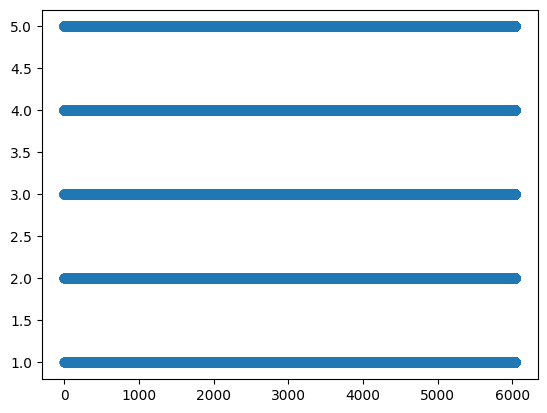

In [38]:
plt.scatter(data_ratings['userId'],data_ratings['rating'])

In [39]:
import numpy as np
ratings_mat = data_ratings.to_numpy()
print(ratings_mat)

[[   1 1193    5]
 [   1  661    3]
 [   1  914    3]
 ...
 [6040  562    5]
 [6040 1096    4]
 [6040 1097    4]]


In [40]:
data_ratings= pd.DataFrame(data_ratings)
print(data_ratings)

         userId  movieId  rating
0             1     1193       5
1             1      661       3
2             1      914       3
3             1     3408       4
4             1     2355       5
...         ...      ...     ...
1000204    6040     1091       1
1000205    6040     1094       5
1000206    6040      562       5
1000207    6040     1096       4
1000208    6040     1097       4

[1000209 rows x 3 columns]


In [41]:
data_ratings_array=data_ratings_array = data_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0).values

In [42]:
print(data_ratings_array)

[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]]


In [43]:
X_train, X_test = train_test_split(data_ratings, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(800167, 3)
(200042, 3)


In [44]:
X_train.shape

(800167, 3)

In [45]:
dummy_train = X_train.copy()
dummy_test = X_test.copy()

# The movies not rated by user is marked as 1 for prediction
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating')

# The movies not rated by user is marked as 0 for evaluation
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating')

dummy_train_array=dummy_train.to_numpy()
dummy_test_array=dummy_test.to_numpy()

In [46]:
print(dummy_train_array)
dummy_train_array.shape

[[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]


(6040, 3683)

In [47]:
dummy_train_array.shape[1]

3683

In [48]:
user_id = int(input("Enter UserID: "))

Enter UserID: 987


In [49]:
rated_items_train = np.where((~np.isnan(dummy_train_array[user_id, :]))& (dummy_train_array[user_id, :] >= 1) & (dummy_train_array[user_id, :] <= 5))[0]
rated_items_test = np.where((~np.isnan(dummy_test_array[user_id, :]))& (dummy_test_array[user_id, :] >= 1) & (dummy_test_array[user_id, :] <= 5))[0]

print(rated_items_train)

print(rated_items_test)
similarity_values = []

[ 117  143  252  464  575  589  796 1006 1012 1019 1102 1118 1124 1125
 1148 1149 1161 1167 1172 1201 1209 1254 1282 1289 1361 1519 1566 1762
 1778 1953 2116 2147 2191 2360 2526 2527 2543 2572 2576 2635 2691 2693
 2694 2695 2741 2837 2841 2867 2945 2962 3040 3041 3056 3105 3193 3254
 3271 3345 3354 3360 3489]
[ 273  939 1101 1386 1704 2050 2599 2821 3081 3084 3104 3105]


# **ADJUSTED COSINE FORMULA**

# **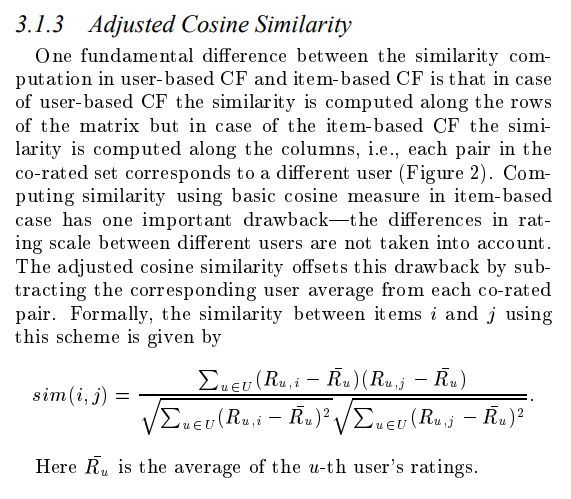**

In [50]:
def adjusted_cosine_similarity(ratings_matrix, u, v):
    ratings_u = ratings_matrix[:, u]
    ratings_v = ratings_matrix[:, v]

    bu = np.nanmean(ratings_u)
    print
    bv = np.nanmean(ratings_v)

    centered_ratings_u = ratings_u - bu
    centered_ratings_v = ratings_v - bv

    numerator = np.nansum(centered_ratings_u * centered_ratings_v)
    denominator = np.sqrt(np.nansum(centered_ratings_u**2)) * np.sqrt(np.nansum(centered_ratings_v**2))

    if denominator == 0.0 or np.isnan(denominator):
        similarity = 0.0
    else:
        similarity = numerator / denominator
    return similarity

In [51]:
predicted_ratings = {}
similarity_values = []
similarity_dict = {}
sorted_similarity_dict={}
pos_similarity_dict={}

# **WEIGHTED SUM-PREDICTION**

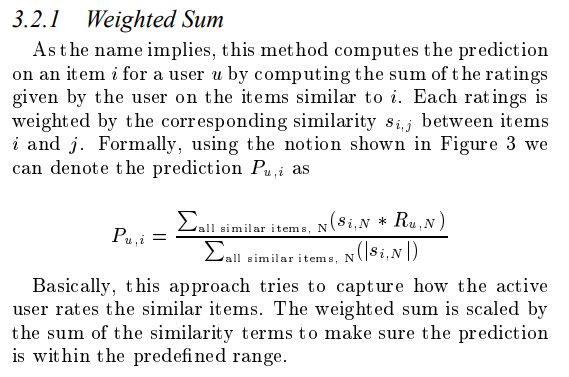

In [52]:
def predict_ratings(user_id, rated_items_test):
    global predicted_ratings
    global similarity_values
    global similarity_dict
    global sorted_similarity_dict
    global pos_similarity_dict
    for item_id in rated_items_test:

        for item in rated_items_train:
            similarity = adjusted_cosine_similarity(dummy_train_array, item_id, item)
            similarity_values.append(similarity)

        similarity_dict = dict(zip(rated_items_train, similarity_values))
        sorted_similarity_dict = dict(sorted(similarity_dict.items(), key=lambda x: x[1], reverse=True))
        pos_similarity_dict = {k: v for k, v in sorted_similarity_dict.items() if v > 0}

        weighted_sum = 0.0
        similarity_sum = 0.0

        for rated_item, similarity_value in pos_similarity_dict.items():
            rating = dummy_train_array[user_id, rated_item]

            weighted_sum += similarity_value * rating
            similarity_sum += similarity_value

        if similarity_sum == 0.0 or np.isnan(similarity_sum):
            predicted_rating = 0.0
        else:
            predicted_rating = weighted_sum / similarity_sum

        predicted_ratings[item_id] = predicted_rating
    # print(similarity_dict)
    return predicted_ratings

# **MEAN ABSOLUTE ERROR**


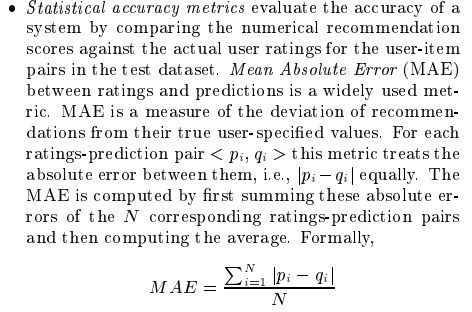

MAE: Measures the average absolute difference between actual and predicted values, with lower values indicating better accuracy.

RMSE: Similar to MAE but considers the square root of the average squared differences.

In [53]:
def mean_absolute_error(predicted_ratings, actual_ratings):
    abs_diff = 0.0
    count = 0

    for i in range(len(predicted_ratings)):
        if i < len(actual_ratings):
            abs_diff += abs(actual_ratings[i] - predicted_ratings[i])
            count += 1

    if count > 0:
        mae = abs_diff / count
    else:
        mae = 0.0

    return mae


In [54]:
actual_ratings = dummy_test_array[user_id, rated_items_test]
actual_ratings_dict = dict(zip(rated_items_test,actual_ratings))

In [55]:
predicted_ratings = predict_ratings(user_id, rated_items_test)
predicted_ratings_values = list(predicted_ratings.values())
mae = mean_absolute_error(predicted_ratings_values, actual_ratings)
print("\nMean Absolute Error: ", mae)


Mean Absolute Error:  1.1081428515856586


In [56]:
print(rated_items_train)
print(rated_items_test)

print("Similarity values of userID: ",user_id)
print(similarity_dict)
print("\nPredicted rating for userID: ",user_id)
print(predicted_ratings)
print("\nActual rating: ",actual_ratings_dict)
print("\nMean Absolute Error for userID: ",user_id)
print(mae)
# print("\n",rated_items_train)
# print(rated_items_test)

[ 117  143  252  464  575  589  796 1006 1012 1019 1102 1118 1124 1125
 1148 1149 1161 1167 1172 1201 1209 1254 1282 1289 1361 1519 1566 1762
 1778 1953 2116 2147 2191 2360 2526 2527 2543 2572 2576 2635 2691 2693
 2694 2695 2741 2837 2841 2867 2945 2962 3040 3041 3056 3105 3193 3254
 3271 3345 3354 3360 3489]
[ 273  939 1101 1386 1704 2050 2599 2821 3081 3084 3104 3105]
Similarity values of userID:  987
{117: 0.02250338622638183, 143: 0.007944249467961394, 252: 0.017433731741886865, 464: -0.005260908669116286, 575: 0.030974947207173913, 589: 0.03804110277328473, 796: 0.03320321735619562, 1006: 0.04973136256785386, 1012: 0.038393732329919036, 1019: 0.03207613713353227, 1102: 0.015747313070699938, 1118: 0.019911885529747084, 1124: 0.007314503668197317, 1125: 0.01056027359174633, 1148: 0.013245909948208172, 1149: 0.03435428141202326, 1161: 0.044434552674177966, 1167: -0.0013672007679487073, 1172: 0.018617001733228042, 1201: 0.025166500896265775, 1209: 0.030969079765496656, 1254: 0.0305655

The item-based collaborative filtering model's predictions for user 987 show an average error of 1.108, indicating the degree of deviation between the predicted and actual preferences.